In [1]:
import numpy as np
from scipy import signal

# Difference-equation filtering 
$\sum_{k=0}^Na_k*y\lbrack n-k\rbrack\;=\;\sum_{k=0}^Mb_k*x\lbrack n-k\rbrack\;$

In [13]:

# Sum(ak*y[n-k]) = Sum(bk*x[n-k])
## IIR Filter
x = np.array([1., 0., 0., 0.])
b = np.array([1.0/2, 1.0/4])
a = np.array([1.0, -1.0/3])
signal.lfilter(b, a, x)

array([0.5       , 0.41666667, 0.13888889, 0.0462963 ])

In [14]:
zi = signal.lfiltic(b, a, y=[2.])
signal.lfilter(b, a, x, zi=zi)

(array([1.16666667, 0.63888889, 0.21296296, 0.07098765]), array([0.02366255]))

In [15]:
# get poles and zeros
signal.tf2zpk(b, a)

(array([-0.5]), array([0.33333333]), 0.5)

# FIR  Filters Design

In [7]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [10]:
# design FIR low-pass and band-pass
b1 = signal.firwin(40, 0.5)
b2 = signal.firwin(41, [0.3, 0.8])
w1, h1 = signal.freqz(b1)
w2, h2 = signal.freqz(b2)

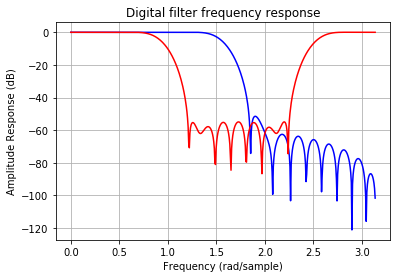

In [9]:
# Pi correspond a la frequence de Nyquist
plt.title('Digital filter frequency response')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'b')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'r')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

In [11]:
b = signal.firwin2(150, [0.0, 0.3, 0.6, 1.0], [1.0, 2.0, 0.5, 0.0])
w, h = signal.freqz(b)

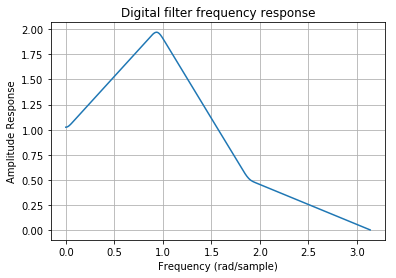

In [12]:
plt.title('Digital filter frequency response')
plt.plot(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

# IIR  Filters Design

In [16]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

b, a = signal.iirfilter(4, Wn=0.2, rp=5, rs=60, btype='lowpass', ftype='ellip')
w, h = signal.freqz(b, a)

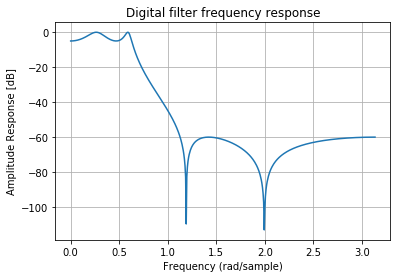

In [17]:
plt.title('Digital filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

# Analog Filter Design

In [18]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [19]:
b, a = signal.iirdesign(wp=100, ws=200, gpass=2.0, gstop=40., analog=True)
w, h = signal.freqs(b, a)

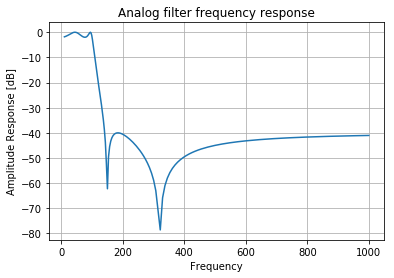

In [20]:
plt.title('Analog filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency')
plt.grid()
plt.show()

In [21]:
z, p, k = signal.tf2zpk(b, a)

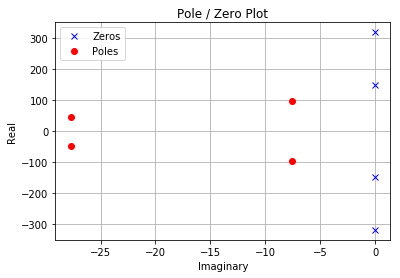

In [23]:
plt.plot(np.real(z), np.imag(z), 'xb')
plt.plot(np.real(p), np.imag(p), 'or')
plt.legend(['Zeros', 'Poles'], loc=2)
plt.title('Pole / Zero Plot')
plt.ylabel('Real')
plt.xlabel('Imaginary')
plt.grid()
plt.show()